In [1]:
%cd supervised
%load_ext autoreload
%autoreload 2

import data
import train
import evaluate
import models
import torch

/home/maarten/Documents/masterthesis/supervised


# Dataset analysis

In [ ]:
import glob
from lxml import etree

positives = []
negatives = []
for path in glob.glob('../training_data/*.xml'):
    with open(path, 'r') as f:
        xml = etree.fromstring(f.read().encode('utf-8'))
    pos = len(xml.xpath('/pdf2xml/page/text[@is-speech="true"]'))
    neg = len(xml.xpath('/pdf2xml/page/text[@is-speech="false"]'))
    positives.append(pos)
    negatives.append(neg)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

sns.distplot(positives, axlabel='positive samples per file')
fig = plt.gcf()
plt.show()
fig.savefig('distribution.pdf')

print(tabulate([['Positives samples', sum(positives)],
                ['Negative samples', sum(negatives)]]))

# Training and evaluation

In [2]:
num_clusters = 5
window_size = 11
window_label = 6

files = [f'../clusterlabeled-fixed-{num_clusters}/18{i:03d}.xml' for i in [1, 2, 3]]
test_files = [f'../clusterlabeled-fixed-{num_clusters}/18{i:03d}.xml' for i in [1]]

full_window_dataset = data.GermanDataset(files, num_clusters, 584, 584, window_size, window_label,
                                        cluster_fmt=data.ClusterFmt.FULL_WINDOW)
only_center_dataset = data.GermanDataset(files, num_clusters, 584, 584, window_size, window_label,
                                        cluster_fmt=data.ClusterFmt.ONLY_CENTRAL)
only_idx_dataset = data.GermanDataset(files, num_clusters, 584, 584, window_size, window_label,
                                        cluster_fmt=data.ClusterFmt.FULL_WINDOW_ONLY_IDX)

Creating dictionary:  67%|██████▋   | 2/3 [00:00<00:00, 19.59it/s]

Retrieved 584 positive samples, 28169 negative samples.


Creating dictionary:  67%|██████▋   | 2/3 [00:00<00:00, 19.26it/s]

Retrieved 584 positive samples, 28169 negative samples.


100%|██████████| 584/584 [00:11<00:00, 50.50it/s]


Retrieved 584 positive samples, 28169 negative samples.


# Test the different kinds of cluster handling
# 1000 samples

In [4]:
params = train.CNNParams(
    embed_size=300,
    dropout=0.0,
    epochs=50,
    filters=[(33, 3), (34, 5), (33, 7)],
    num_layers=1
)

optim_fn = lambda p: torch.optim.Adadelta(p, weight_decay=1e-3)

no_labels = evaluate.cross_val(10, 400, lambda r: models.NoClusterLabels(r, params.dropout),
                               optim_fn, only_idx_dataset, params)
only_center = evaluate.cross_val(10, 400, lambda r: models.CategoricalClusterLabelsOnlyCenter(r, num_clusters, params.dropout),
                                 optim_fn, only_center_dataset, params)
full_window = evaluate.cross_val(10, 400, lambda r: models.CategoricalClusterLabels(r, num_clusters, window_size, params.dropout),
                                 optim_fn, full_window_dataset, params)
with_cnn = evaluate.cross_val(10, 400, lambda r: models.ClusterLabelsCNN(r, num_clusters, params.dropout),
                              optim_fn, only_idx_dataset, params)

/usr/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.93it/s, loss=0.000499, Δloss=7.21e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.99it/s, loss=0.000495, Δloss=6.82e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.93it/s, loss=0.000524, Δloss=7.2e-06]  


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.86it/s, loss=0.00051, Δloss=7.58e-06]  


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.93it/s, loss=0.000515, Δloss=7.29e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.91it/s, loss=0.00051, Δloss=7.26e-06]  


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.88it/s, loss=0.000519, Δloss=7.21e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.84it/s, loss=0.00049, Δloss=6.99e-06]  


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.85it/s, loss=0.000518, Δloss=7.15e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.81it/s, loss=0.00052, Δloss=6.85e-06]  


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.97it/s, loss=0.000517, Δloss=7.27e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.90it/s, loss=0.000523, Δloss=7.09e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.96it/s, loss=0.000504, Δloss=7.27e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.93it/s, loss=0.0005, Δloss=7.07e-06]   


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.79it/s, loss=0.000512, Δloss=6.83e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.97it/s, loss=0.000508, Δloss=6.84e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.85it/s, loss=0.000514, Δloss=7.09e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.84it/s, loss=0.000511, Δloss=6.74e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.96it/s, loss=0.000513, Δloss=6.89e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.87it/s, loss=0.000505, Δloss=7.65e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.77it/s, loss=0.000501, Δloss=7.23e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.83it/s, loss=0.000532, Δloss=7.23e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.82it/s, loss=0.00054, Δloss=6.67e-06]  


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.88it/s, loss=0.000502, Δloss=7.13e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.84it/s, loss=0.000524, Δloss=6.84e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.82it/s, loss=0.000516, Δloss=6.72e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.84it/s, loss=0.000534, Δloss=7.12e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.82it/s, loss=0.000515, Δloss=6.68e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.92it/s, loss=0.000532, Δloss=6.98e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:07<00:00,  6.83it/s, loss=0.000505, Δloss=6.93e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:08<00:00,  5.86it/s, loss=0.000525, Δloss=7.72e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:08<00:00,  5.90it/s, loss=0.000542, Δloss=7.01e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:08<00:00,  5.93it/s, loss=0.000523, Δloss=7.25e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:08<00:00,  5.95it/s, loss=0.00054, Δloss=7.35e-06]  


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:08<00:00,  5.82it/s, loss=0.000518, Δloss=6.79e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:08<00:00,  6.11it/s, loss=0.000479, Δloss=7.45e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:08<00:00,  5.85it/s, loss=0.00056, Δloss=7.44e-06]  


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:08<00:00,  5.83it/s, loss=0.000525, Δloss=7.39e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:08<00:00,  5.95it/s, loss=0.000502, Δloss=7.63e-06] 


Training on 200 positives and 200 negatives, testing on 117 samples.


Training: 100%|██████████| 50/50 [00:08<00:00,  5.90it/s, loss=0.000517, Δloss=7.76e-06] 


Average convergence speed


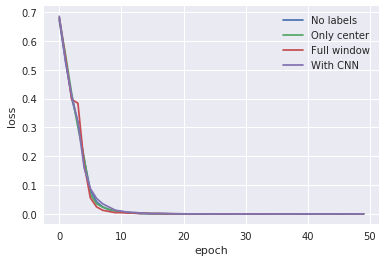


Average P/R curve


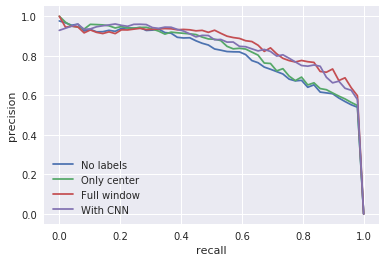


Score table:
               F1 mean    F1 stddev    AoC mean    AoC std    Area under averaged curve
-----------  ---------  -----------  ----------  ---------  ---------------------------
No labels     0.749483    0.0186683    0.751369  0.015763                      0.804154
Only center   0.761342    0.0180184    0.764932  0.013936                      0.820526
Full window   0.822306    0.0283985    0.805362  0.025949                      0.854851
With CNN      0.818964    0.0251438    0.800509  0.0460182                     0.84903

AP plots:


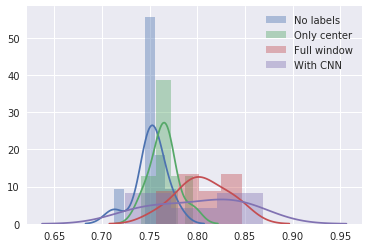

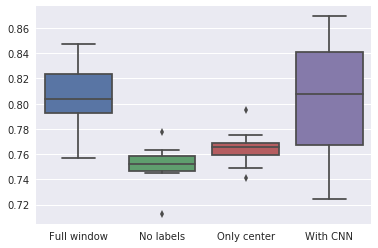


F1 plots:


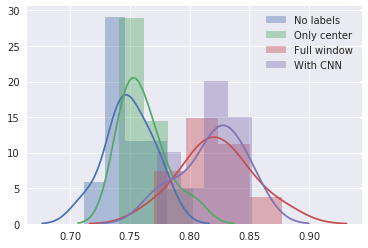

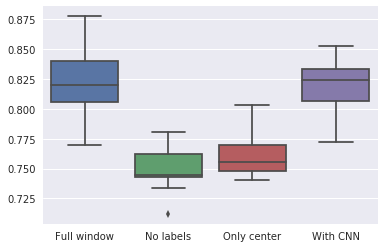


Statistical significance:
F1 score
               No labels    Only center    Full window     With CNN
-----------  -----------  -------------  -------------  -----------
No labels    1              0.187184       9.55362e-06  4.56166e-06
Only center  0.187184       1              6.49426e-05  3.79602e-05
Full window  9.55362e-06    6.49426e-05    1            0.794574
With CNN     4.56166e-06    3.79602e-05    0.794574     1

Area under curve
               No labels    Only center    Full window    With CNN
-----------  -----------  -------------  -------------  ----------
No labels    1               0.0692561     8.62764e-05   0.0113462
Only center  0.0692561       1             0.00107621    0.0491773
Full window  8.62764e-05     0.00107621    1             0.786814
With CNN     0.0113462       0.0491773     0.786814      1


In [12]:
evaluate.analyze({'No labels': no_labels,
                  'Only center': only_center,
                  'Full window': full_window,
                  'With CNN': with_cnn})

# Test regularization methods

In [6]:
params = train.CNNParams(
    embed_size=300,
    dropout=0.0,
    epochs=50,
    filters=[(33, 3), (34, 5), (33, 7)],
    num_layers=1
)

optim_no_decay = lambda p: torch.optim.Adadelta(p)
optim_decay = lambda p: torch.optim.Adadelta(p, weight_decay=1e-3)

params.dropout = 0.0
no_reg = evaluate.cross_val(10, 400, lambda r: models.CategoricalClusterLabels(r, num_clusters, window_size, params.dropout),
                            optim_no_decay, full_window_dataset, params)
only_decay = evaluate.cross_val(10, 400, lambda r: models.CategoricalClusterLabels(r, num_clusters, window_size, params.dropout),
                                optim_decay, full_window_dataset, params)

params.dropout = 0.5
only_dropout = evaluate.cross_val(10, 400, lambda r: models.CategoricalClusterLabels(r, num_clusters, window_size, params.dropout),
                                  optim_no_decay, full_window_dataset, params)
dropout_decay = evaluate.cross_val(10, 400, lambda r: models.CategoricalClusterLabels(r, num_clusters, window_size, params.dropout),
                                   optim_decay, full_window_dataset, params)

/usr/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
Training: 100%|██████████| 50/50 [00:07<00:00,  6.69it/s, loss=0.326, Δloss=-0.0434] 


Average convergence speed


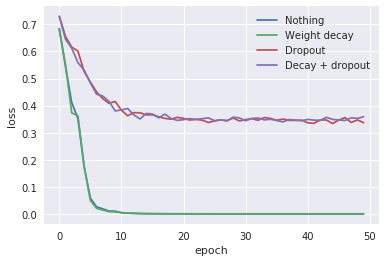


Average P/R curve


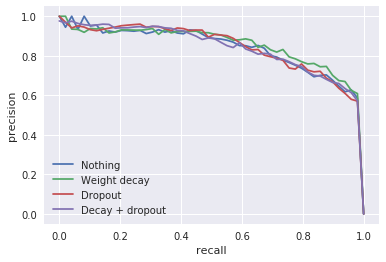


Score table:
                   F1 mean    F1 stddev    AoC mean    AoC std    Area under averaged curve
---------------  ---------  -----------  ----------  ---------  ---------------------------
Nothing           0.804767    0.0296268    0.788335  0.0371614                     0.841776
Weight decay      0.81864     0.0217756    0.814018  0.0257564                     0.855373
Dropout           0.802058    0.0251627    0.791098  0.0177438                     0.845084
Decay + dropout   0.795042    0.0200003    0.788159  0.02573                       0.842395

AP plots:


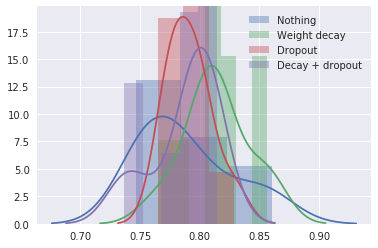

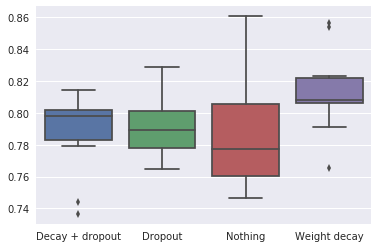


F1 plots:


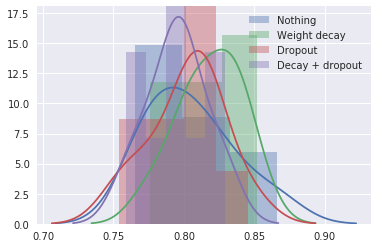

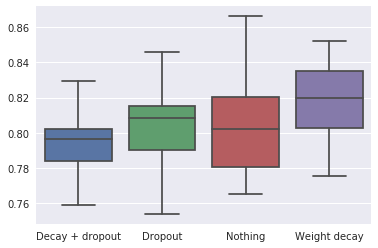


Statistical significance:
F1 score
                   Nothing    Weight decay    Dropout    Decay + dropout
---------------  ---------  --------------  ---------  -----------------
Nothing           1              0.273808    0.836805          0.426538
Weight decay      0.273808       1           0.152605          0.0278276
Dropout           0.836805       0.152605    1                 0.521271
Decay + dropout   0.426538       0.0278276   0.521271          1

Area under curve
                   Nothing    Weight decay    Dropout    Decay + dropout
---------------  ---------  --------------  ---------  -----------------
Nothing           1              0.107678   0.843602            0.990811
Weight decay      0.107678       1          0.0430064           0.047143
Dropout           0.843602       0.0430064  1                   0.781455
Decay + dropout   0.990811       0.047143   0.781455            1


In [11]:
evaluate.analyze({'Nothing': no_reg,
                  'Weight decay': only_decay,
                  'Dropout': only_dropout,
                  'Decay + dropout': dropout_decay})